https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [1]:
# Load the VGG model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

from numpy import expand_dims

from matplotlib import pyplot

In [2]:
# Load the model
model = VGG16()

In [3]:
# Summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# Summarize filter shapes
for layer in model.layers:
    # Check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # Get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [5]:
# Retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# Normalize filter values to 0-1 so we can visualize them
fmin, fmax = filters.min(), filters.max()
filters = (filters - fmin)/(fmax - fmin)

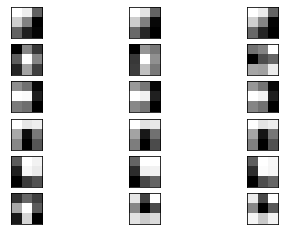

In [6]:
# Plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # Get the filter
    f = filters[:, :, :, i]
    # Plot each channel separately
    for j in range(3):
        # Specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# Show the figure
pyplot.show()

# How to visualize feature maps

Image:
    
https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/bird.jpg

In [7]:
# Summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # Check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # Get filter weights
    filters, biases = layer.get_weights()
    # Summarize output shape
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [8]:
# Load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

In [9]:
# Convert the image to array
img = img_to_array(img)

In [10]:
# Expand dimensions so that it represents a single "sample"
img = expand_dims(img, axis=0)

In [11]:
# Prepare the image (scale the pixel values for the VGG)
img = preprocess_input(img)

In [12]:
# Redefine the model to output right after the first hidden layer
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Get feature map for the first hidden layer
feature_maps = model.predict(img)

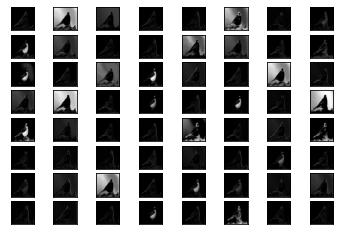

In [14]:
# Plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # Specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# Show the figure
pyplot.show()

In [15]:
# Load the model
model = VGG16()
# Redefine the model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

In [16]:
# Get feature map for the first hidden layer
feature_maps = model.predict(img)

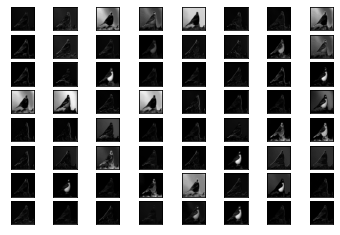

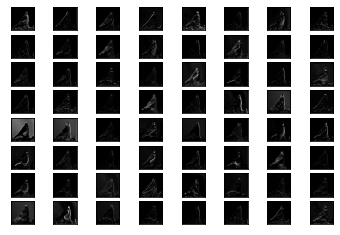

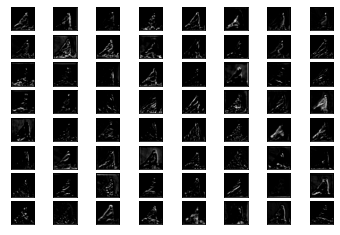

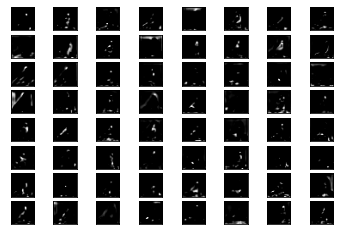

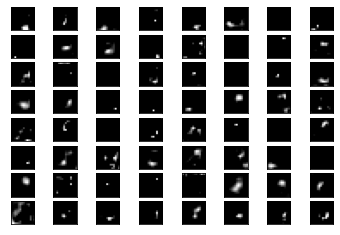

In [17]:
# Plot the output from each block
square = 8
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # Specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # Plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # Show the figure
    pyplot.show()